In [82]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [83]:
df=pd.read_csv(r'train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
# Shape of the data
df.shape

(891, 12)

# Preprocessing

In [85]:
# Unique value in the passengerId column
len(df.PassengerId.unique())

891

* Each row has unique value in the column. It does not have  a relationship with the survival of the passenger

In [86]:
# Drop the passengerID column
df=df.drop(columns=['PassengerId'],axis=1)

In [87]:
# While doing analysis or creating model the passenger name does not have a impact on the result.
# Drop the Name column
df=df.drop(columns=['Name'],axis=1)

In [88]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
# Check for null values in the dataset
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* **Age** has 177 null values
* **Cabin** has 687 null values
* **Embarked** has 2 null values

Average age--> 29.69911764705882
Median age--> 28.0


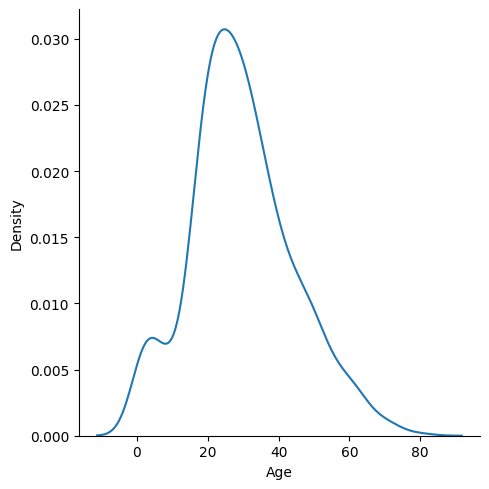

In [90]:
# Let us see the distribution of the AGE column
sns.displot(df.Age,kind='kde')
print('Average age-->',df.Age.mean())
print('Median age-->',df.Age.median())

<Axes: >

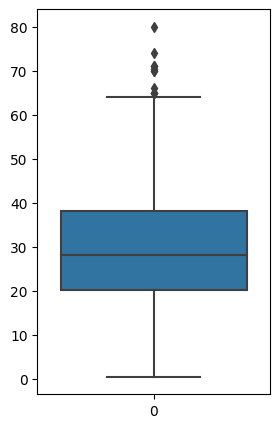

In [91]:
plt.figure(figsize=(3,5))
sns.boxplot(df.Age)

In [92]:
age_iq3=df.Age.quantile(0.75)
age_iq1=df.Age.quantile(0.25)
# Let's calculate the percentage numbers that are outliers
# number<(age_iq1-1.5*age_iq1) or number>(age_iq3+1.5*age_iq3) is considered as outlier
age_outliers=df.loc[(df.Age<(age_iq1-1.5*(age_iq3-age_iq1))) | (df.Age>(age_iq3+1.5*(age_iq3-age_iq1)))]
print('Percentage of outliers in Age column is ',len(age_outliers)/df.shape[0])

Percentage of outliers in Age column is  0.012345679012345678


* Since **Mean** and **Median** are almost similar we can say that our Age is *Normally* distributed.

* Since approx 1.2% of the data point are outlier in the Age column, we will use **Median** to impute the null values in the corresponding column

In [93]:
df.Age=df.Age.fillna(df.Age.median()) #Imputing the null values

In [94]:
# Number of Null values in the Cabin column
df.Cabin.isnull().sum()

687

* 78% values in the column are null, so we can drop the column

In [95]:
df=df.drop(columns=['Cabin'],axis=1)

In [96]:
# We will impute the null values in the embarked column with the mode of the column since it has categorical values.
df.Embarked=df.Embarked.fillna(df.Embarked.mode()[0])

In [97]:
# Now check if there is any column that has null value
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

* Now we do not have any null value in any column

# EDA

In [98]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [99]:
# Different category in column sex
df.Sex.unique()

array(['male', 'female'], dtype=object)

* There are **two nominal** categorical value in the column so we can use **one-hot** encoding method.

In [100]:
sex_df=pd.get_dummies(df.Sex)   # Applying one-hot encoding

In [101]:
sex_df.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [102]:
# different value in the Embarked column
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

* Again we have **3 nominal** categorical values so we can apply **one-hot** encoding on this column.

In [103]:
embarked_df=pd.get_dummies(df.Embarked)     # Applying one-hot encoding

In [104]:
embarked_df.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [105]:
embarked_df.rename(columns={'C':'Cherbourg','Q':'Queenstown','S':'Southampton'},inplace=True) #Renaming columns
embarked_df.head()

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [106]:
# Number of Unique values in the ticket column
len(df.Ticket.unique())

681

In [107]:
# Ticket number is a unique number and does not impact the survival of the passenger
# We will drop the column ticket
df=df.drop(columns=['Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [108]:
avg_age_by_survival=df.groupby(by=['Survived'])['Age'].mean()

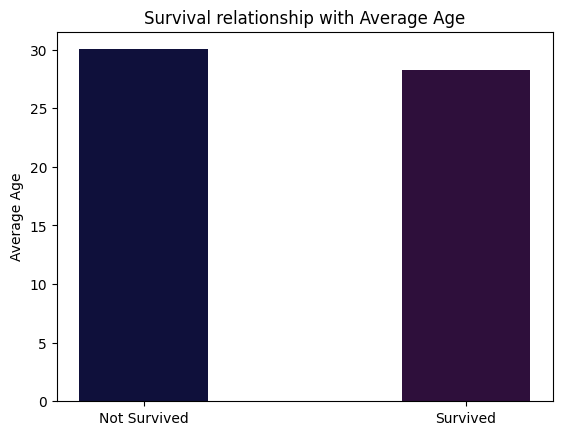

In [109]:
plt.bar(x=['Not Survived','Survived'],height=avg_age_by_survival.values,width=0.4,color=['#0f103b','#2e0f3b'])
plt.ylabel('Average Age')
plt.title('Survival relationship with Average Age')
plt.show()

* Average age of the passenger who did not survived is more than average age of passenger who survived

In [110]:
avg_fare_via_class=df.groupby(by=['Pclass'])['Fare'].mean()

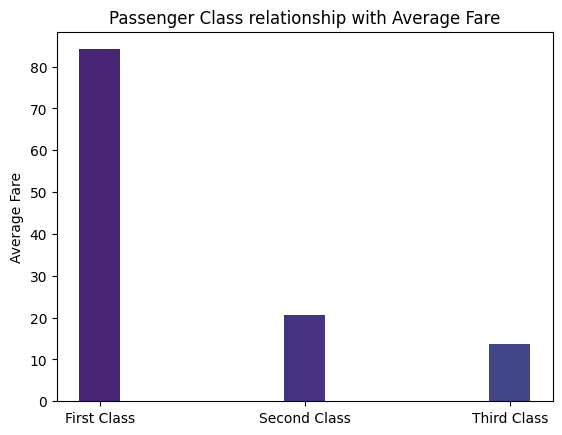

In [111]:
cmp=plt.get_cmap('viridis')
colors=cmp(np.linspace(0.1,0.2,len(avg_fare_via_class)))
plt.bar(x=['First Class','Second Class','Third Class'],height=avg_fare_via_class.values,width=0.2,color=colors)
plt.ylabel('Average Fare')
plt.title('Passenger Class relationship with Average Fare')
plt.show()

* Average Fare of the **First Class** ticket is very high in comparison to that of **Second** and **Third** Class.

In [112]:
avg_age_by_sex=df.groupby(by=['Sex'])['Age'].mean()

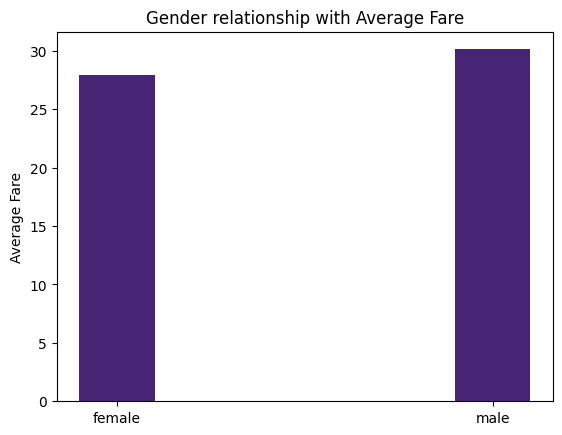

In [113]:
cmp=plt.get_cmap('viridis')
colors=cmp(np.linspace(0.1,0.1,len(avg_age_by_sex)))
plt.bar(x=avg_age_by_sex.index,height=avg_age_by_sex.values,width=0.2,color=colors)
plt.ylabel('Average Fare')
plt.title('Gender relationship with Average Fare')
plt.show()

* Average age of the **male** treavelling in the ship is more than **female**.

In [114]:
survived=df.loc[df.Survived==1] #Data corresponding to all the survivors
not_survived=df.loc[df.Survived==0] #Data corresponding to all that did not survived

In [115]:
survive_via_pclass=survived.groupby(by=['Pclass'])['Survived'].count()

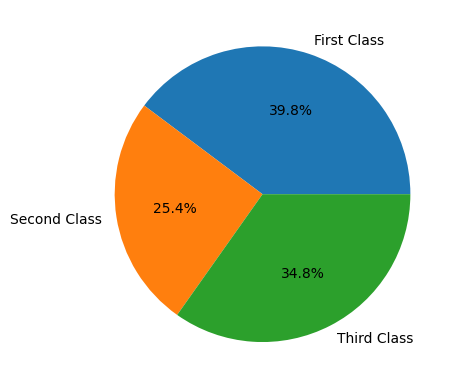

In [116]:
plt.pie(x=survive_via_pclass.values,labels=['First Class','Second Class','Third Class'],autopct='%1.1f%%')
plt.show()

* Among the survivors 39.8% were from **First Class**, 25.4% were from **Second Class** and 34.8% were from **Third Class**.

In [117]:
not_survive_via_pclass=not_survived.groupby(by=['Pclass'])['Survived'].count()

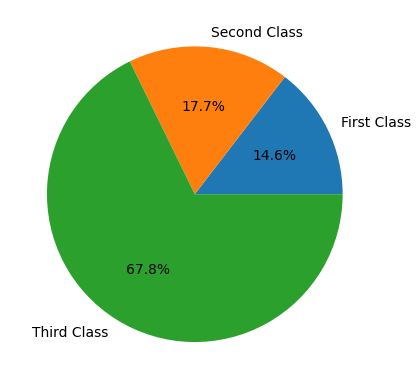

In [118]:
plt.pie(x=not_survive_via_pclass.values,labels=['First Class','Second Class','Third Class'],autopct='%1.1f%%')
plt.show()

* 67.8% passenger travelling in **Third Class** did not survived. 
* 17.7% passenger travelling in **Second Class** did not survived. 
* 14.6% passenger travelling in **First Class** did not survived. 

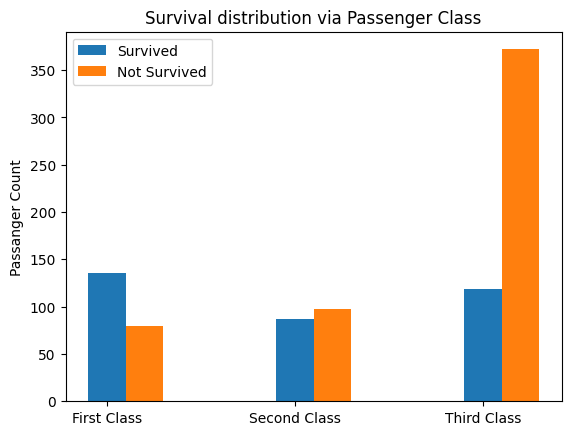

In [119]:
x1=['First Class','Second Class','Third Class']
x2=np.arange(len(x1))+0.2
plt.bar(height=survive_via_pclass.values,x=x1,width=0.2,align='center',label='Survived')
plt.bar(height=not_survive_via_pclass.values,x=x2,width=0.2,align='center',label='Not Survived')
plt.ylabel('Passanger Count')
plt.title('Survival distribution via Passenger Class')
plt.legend()
plt.show()

In [120]:
survived.groupby(by=['Sex'])['Survived'].count()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [121]:
not_survived.groupby(by=['Sex'])['Survived'].count()

Sex
female     81
male      468
Name: Survived, dtype: int64

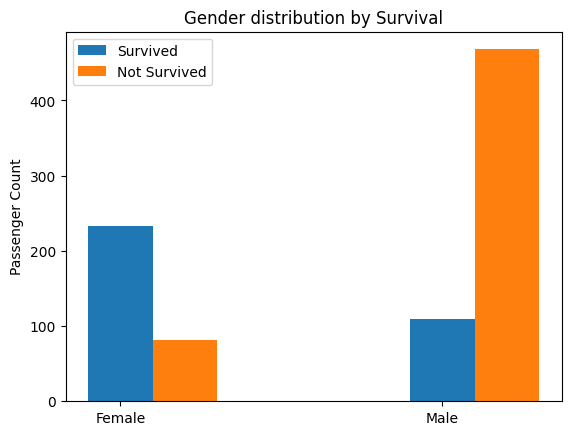

In [122]:
x1=['Female','Male']
x2=np.arange(len(x1))+0.2
plt.bar(x=x1,height=survived.groupby(by=['Sex'])['Survived'].count(),width=0.2,align='center',label='Survived')
plt.bar(x=x2,height=not_survived.groupby(by=['Sex'])['Survived'].count(),width=0.2,align='center',label='Not Survived')
plt.ylabel('Passenger Count')
plt.title('Gender distribution by Survival')
plt.legend()
plt.show()

* The above plot shows that the number of **Female** survived is higher than **Male**.

In [123]:
survived.groupby(by=['Pclass','Sex'])['Survived'].count()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

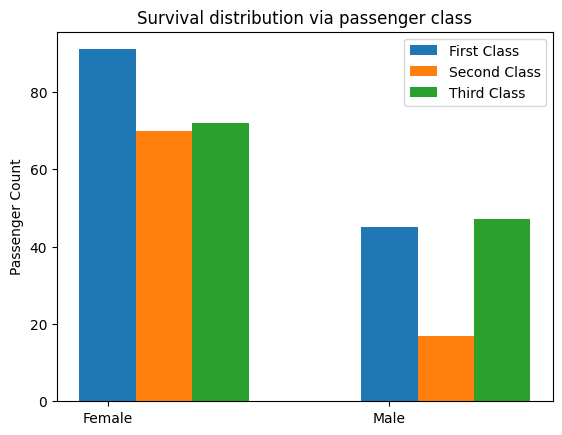

In [124]:
x1=['Female','Male']
y1=[91,45]
x2=np.arange(len(x1))+0.2
y2=[70,17]
x3=np.arange(len(x2))+0.4
y3=[72,47]
plt.bar(x=x1,height=y1,width=0.2,label='First Class')
plt.bar(x=x2,height=y2,width=0.2,label='Second Class')
plt.bar(x=x3,height=y3,width=0.2,label='Third Class')
plt.ylabel('Passenger Count')
plt.title('Survival distribution via passenger class')
plt.legend()
plt.show()

In [125]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [126]:
# Add the one-hot encoded column
df=pd.concat([df,sex_df,embarked_df],axis=1)
# Remove the column for which one-hot encoded columns are added
df=df.drop(columns=['Sex','Embarked'],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Cherbourg,Queenstown,Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


** PREPROCESS TESTING DATA**

In [127]:
test_df=pd.read_csv(r'test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
# Drop PassengerID,Name,Cabin and Ticket column
test_df=test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [129]:
# Check for Null values
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [130]:
# We will inpute the Age with Medain Age from training data and Fare from Mean Fare from Training data
test_df.Age=test_df.Age.fillna(df.Age.median())
test_df.Fare=test_df.Fare.fillna(df.Fare.mean())

In [131]:
test_sex_df=pd.get_dummies(test_df.Sex)
test_sex_df.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [132]:
test_embarked_df=pd.get_dummies(test_df.Embarked)
test_embarked_df.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [133]:
test_embarked_df.rename(columns={'C':'Cherbourg','Q':'Queenstown','S':'Southampton'},inplace=True)
test_embarked_df.head()

,Cherbourg,Queenstown,Southampton
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [134]:
# Add the one-hot encoded column
test_df=pd.concat([test_df,test_sex_df,test_embarked_df],axis=1)
# Remove the column for which one-hot encoded columns are added
test_df=test_df.drop(columns=['Sex','Embarked'],axis=1)
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Cherbourg,Queenstown,Southampton
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


# Model Creation

In [135]:
X=df.iloc[:,1:] # All independent features
Y=df.iloc[:,0] # Dependent feature

In [136]:
# Importing required library
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,roc_curve,auc

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [138]:
std=StandardScaler() # Creating a Standardscaler Object

In [139]:
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [140]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [141]:
prediction_probability=classifier.predict_proba(X_test) # Prediction probability corresponding to classes

In [142]:
prediction=prediction_probability[:,1] #Probability corresponding to class 1

In [143]:
fpr, tpr, thresholds = roc_curve(y_test, prediction) #False Positive rate ,True Positive rate for different threshold values

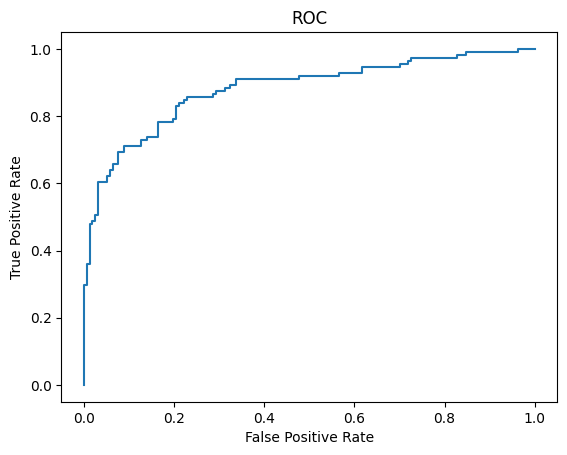

In [144]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [145]:
print('-----Area under ROC-----')
print(auc(fpr,tpr))

-----Area under ROC-----
0.8800711539565044


In [146]:
# We can find the optimal value of the threshold using the Youden’s J statistic.
Youden_J=tpr-fpr
# get the index where Youden_J is maximum
max_index=Youden_J.argmax()
# the optimal threshold is corresponding to threshold[max_index]
optimal_threshold=thresholds[max_index]

In [147]:
# The optimal value threshold
optimal_threshold

0.35137265525812766

In [148]:
# Now we will use the given threshold 
pred_prob=classifier.predict_proba(X_test)[:,1]
prediction=(pred_prob>=optimal_threshold).astype(int)

In [149]:
print("-----Confusion Matrix-----")
print(confusion_matrix(y_test,prediction))

-----Confusion Matrix-----
[[124  33]
 [ 18  93]]


In [150]:
# Making prediction for the Test DATA
test_df=std.transform(test_df)

In [168]:
test_prediction_prob=classifier.predict_proba(test_df)[:,1]
test_prediction=(test_prediction_prob>=optimal_threshold).astype(int)

In [169]:
result=pd.read_csv(r'gender_submission.csv')

In [170]:
test_prediction_df=pd.DataFrame({'Survived':test_prediction})
test_prediction_df.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [171]:
result.Survived=test_prediction_df
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [172]:
result.to_csv('gender_submission.csv',index=False)